## 1. Import Necessary Libraries

In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [460]:
music_data = pd.read_csv('Songs_DataList .csv')
music_data

,Unnamed: 0,artist_name,track_name,track_id,track_popularity,artist_id,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Arijit Singh,"Sawan Aaya Hai (From ""Creature 3D"")",1xT7kYNyV29DUsYMsWn9yh,6,4YRxDV8wJFPHPTeXepOstw,0.515,0.671,10.0,-7.510,...,0.1400,0.376,80.181,audio_features,1xT7kYNyV29DUsYMsWn9yh,spotify:track:1xT7kYNyV29DUsYMsWn9yh,https://api.spotify.com/v1/tracks/1xT7kYNyV29D...,https://api.spotify.com/v1/audio-analysis/1xT7...,288177.0,4.0
1,1,Arijit Singh,"Kitni Haseen Hogi (From ""Hit - The First Case"")",3GwKiQJwMXD2vFhTEN3N3r,0,4YRxDV8wJFPHPTeXepOstw,0.473,0.473,8.0,-9.490,...,0.1090,0.358,102.787,audio_features,3GwKiQJwMXD2vFhTEN3N3r,spotify:track:3GwKiQJwMXD2vFhTEN3N3r,https://api.spotify.com/v1/tracks/3GwKiQJwMXD2...,https://api.spotify.com/v1/audio-analysis/3GwK...,330907.0,4.0
2,2,Arijit Singh,Tum Hi Ho,56zZ48jdyY2oDXHVnwg5Di,70,4YRxDV8wJFPHPTeXepOstw,0.528,0.449,5.0,-6.250,...,0.1220,0.317,94.058,audio_features,56zZ48jdyY2oDXHVnwg5Di,spotify:track:56zZ48jdyY2oDXHVnwg5Di,https://api.spotify.com/v1/tracks/56zZ48jdyY2o...,https://api.spotify.com/v1/audio-analysis/56zZ...,261974.0,4.0
3,3,Arijit Singh,"Hardum Humdum (From ""Ludo"")",1KD6MUgh3DzLJ58UoJHOZL,0,4YRxDV8wJFPHPTeXepOstw,0.590,0.821,2.0,-4.933,...,0.4540,0.784,116.942,audio_features,1KD6MUgh3DzLJ58UoJHOZL,spotify:track:1KD6MUgh3DzLJ58UoJHOZL,https://api.spotify.com/v1/tracks/1KD6MUgh3DzL...,https://api.spotify.com/v1/audio-analysis/1KD6...,188000.0,4.0
4,4,Jeet Gannguli,Arijit Singh Mashup (By DJ Paroma),5Ox43gIWUNW6pAgx3F3oi7,51,2kkQthS9OLpK4UqNWYqoVl,0.583,0.766,9.0,-5.142,...,0.3540,0.437,89.962,audio_features,5Ox43gIWUNW6pAgx3F3oi7,spotify:track:5Ox43gIWUNW6pAgx3F3oi7,https://api.spotify.com/v1/tracks/5Ox43gIWUNW6...,https://api.spotify.com/v1/audio-analysis/5Ox4...,245409.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30896,995,K. J. Yesudas,"Iru Meyyum (From ""Njangal Santhushtaranu"") - M...",7jZOBec7YctC09qmelQhgT,5,2wPsNCwhEGb0KvChZ5DD52,0.444,0.477,0.0,-13.334,...,0.1680,0.542,102.870,audio_features,7jZOBec7YctC09qmelQhgT,spotify:track:7jZOBec7YctC09qmelQhgT,https://api.spotify.com/v1/tracks/7jZOBec7YctC...,https://api.spotify.com/v1/audio-analysis/7jZO...,313838.0,4.0
30897,996,K. J. Yesudas,"Manju Nolkum Kalam (From ""Megham"")",4p6D0iW0ex1ivlm62M0B55,0,2wPsNCwhEGb0KvChZ5DD52,0.698,0.358,0.0,-14.612,...,0.0632,0.370,109.936,audio_features,4p6D0iW0ex1ivlm62M0B55,spotify:track:4p6D0iW0ex1ivlm62M0B55,https://api.spotify.com/v1/tracks/4p6D0iW0ex1i...,https://api.spotify.com/v1/audio-analysis/4p6D...,250962.0,4.0
30898,997,K. J. Yesudas,"Priyasakhee (From ""Kaiethum Doorathu"")",6iu299jumXF7UQUtE7qFGg,18,2wPsNCwhEGb0KvChZ5DD52,0.653,0.367,10.0,-11.665,...,0.0811,0.401,114.860,audio_features,6iu299jumXF7UQUtE7qFGg,spotify:track:6iu299jumXF7UQUtE7qFGg,https://api.spotify.com/v1/tracks/6iu299jumXF7...,https://api.spotify.com/v1/audio-analysis/6iu2...,262534.0,1.0
30899,998,K. J. Yesudas,Ahagu Ooviyamaka,3cnyO4yRfl1fylq9mneFCj,0,2wPsNCwhEGb0KvChZ5DD52,0.657,0.710,0.0,-5.881,...,0.1020,0.625,95.156,audio_features,3cnyO4yRfl1fylq9mneFCj,spotify:track:3cnyO4yRfl1fylq9mneFCj,https://api.spotify.com/v1/tracks/3cnyO4yRfl1f...,https://api.spotify.com/v1/audio-analysis/3cny...,378045.0,4.0


## Feature Descriptio
### ---------------------------------------------------------------------------

#### artist_name -string
The name of the artist.
#### track_name -string
The name of the track.

#### track_id -string
The Spotify ID for the track.

#### track_popularity -integer
The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note: the popularity value may lag actual popularity by a few days: the value is not updated in real time.

#### artist_id  -string
The Spotify ID for the artist.

#### danceability -number (float)
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#### energy -number (float)
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

#### key -integer
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
>= -1
<= 11

#### loudness -number (float)
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

#### mode -integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

#### speechiness -number (float)
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

#### acousticness -number (float)
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
>= 0
<= 1

#### instrumentalness -number (float)
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

#### liveness -number (float)
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

#### valence -number (float)
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
>= 0
<= 1

#### tempo -number (float)
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

#### type -string
The object type.
Allowed value:
"audio_features"

#### id -string
The Spotify ID for the track.

#### uri -string
The Spotify URI for the track.

#### track_href -string
A link to the Web API endpoint providing full details of the track.

#### analysis_url -string
A URL to access the full audio analysis of this track. An access token is required to access this data.

#### duration_ms -integer
The duration of the track in milliseconds.

#### time_signature -integer
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
>= 3
<= 7

## 3.Data Understanding

In [461]:
 music_data.shape

(30901, 24)

In [462]:
music_data.isna().sum()

Unnamed: 0           0
artist_name          0
track_name           0
track_id             0
track_popularity     0
artist_id            0
danceability        38
energy              38
key                 38
loudness            38
mode                38
speechiness         38
acousticness        38
instrumentalness    38
liveness            38
valence             38
tempo               38
type                38
id                  38
uri                 38
track_href          38
analysis_url        38
duration_ms         38
time_signature      38
dtype: int64

In [463]:
music_data.describe()

,Unnamed: 0,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,30901.000000,30901.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,30863.000000,3.086300e+04,30863.000000
mean,408.495421,23.468464,0.603708,0.591205,5.338788,-8.552170,0.569906,0.079507,0.433525,0.056408,0.185155,0.547855,116.985563,2.756467e+05,3.866798
std,267.678626,19.210118,0.152222,0.209999,3.489366,4.123201,0.495097,0.092068,0.314796,0.193847,0.147773,0.233374,28.605448,2.050405e+05,0.464870
min,0.000000,0.000000,0.000000,0.000548,0.000000,-44.591000,0.000000,0.000000,0.000001,0.000000,0.015800,0.000000,0.000000,1.357800e+04,0.000000
25%,178.000000,7.000000,0.501000,0.443000,2.000000,-10.349000,0.000000,0.035600,0.125000,0.000000,0.095000,0.369000,94.984000,2.068790e+05,4.000000
50%,377.000000,20.000000,0.619000,0.605000,5.000000,-7.744000,1.000000,0.048300,0.416000,0.000013,0.126000,0.555000,113.962000,2.571430e+05,4.000000
75%,620.000000,37.000000,0.717000,0.752000,8.000000,-5.837000,1.000000,0.081900,0.716000,0.000806,0.226000,0.737000,134.064000,3.085600e+05,4.000000
max,999.000000,95.000000,0.976000,1.000000,11.000000,5.236000,1.000000,0.958000,0.996000,0.992000,0.988000,0.991000,230.185000,5.584696e+06,5.000000


In [464]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30901 entries, 0 to 30900
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        30901 non-null  int64  
 1   artist_name       30901 non-null  object 
 2   track_name        30901 non-null  object 
 3   track_id          30901 non-null  object 
 4   track_popularity  30901 non-null  int64  
 5   artist_id         30901 non-null  object 
 6   danceability      30863 non-null  float64
 7   energy            30863 non-null  float64
 8   key               30863 non-null  float64
 9   loudness          30863 non-null  float64
 10  mode              30863 non-null  float64
 11  speechiness       30863 non-null  float64
 12  acousticness      30863 non-null  float64
 13  instrumentalness  30863 non-null  float64
 14  liveness          30863 non-null  float64
 15  valence           30863 non-null  float64
 16  tempo             30863 non-null  float6

## 4. Data Preprocessing

#### Removing Repeated Tracks

In [466]:
music_data[music_data.duplicated('track_name')]

,Unnamed: 0,artist_name,track_name,track_id,track_popularity,artist_id,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
50,50,Arijit Singh,Jaan 'Nisaar (Arijit),6pzlnyHTVYi5FOmrgOmC95,69,4YRxDV8wJFPHPTeXepOstw,0.481,0.392,4.0,-8.200,...,0.1220,0.257,91.796,audio_features,6pzlnyHTVYi5FOmrgOmC95,spotify:track:6pzlnyHTVYi5FOmrgOmC95,https://api.spotify.com/v1/tracks/6pzlnyHTVYi5...,https://api.spotify.com/v1/audio-analysis/6pzl...,238370.0,4.0
56,56,Pritam,"Phir Na Aisi Raat Aayegi (From ""Laal Singh Cha...",4Zzw8CESa97fNrmrvEdIuL,69,1wRPtKGflJrBx9BmLsSwlU,0.435,0.418,1.0,-7.915,...,0.1000,0.212,128.049,audio_features,4Zzw8CESa97fNrmrvEdIuL,spotify:track:4Zzw8CESa97fNrmrvEdIuL,https://api.spotify.com/v1/tracks/4Zzw8CESa97f...,https://api.spotify.com/v1/audio-analysis/4Zzw...,283225.0,4.0
73,73,Arijit Singh,Ve Maahi,7ltu5scschhmNWp5rp8rVF,57,4YRxDV8wJFPHPTeXepOstw,0.650,0.551,0.0,-6.906,...,0.2190,0.294,102.934,audio_features,7ltu5scschhmNWp5rp8rVF,spotify:track:7ltu5scschhmNWp5rp8rVF,https://api.spotify.com/v1/tracks/7ltu5scschhm...,https://api.spotify.com/v1/audio-analysis/7ltu...,223999.0,4.0
87,87,Vishal-Shekhar,"Ghungroo (From ""War"")",1Ef0TmgS1QrVO6tKHrMMmH,55,6Mv8GjQa7LKUGCAqa9qqdb,0.695,0.729,6.0,-6.274,...,0.5330,0.872,118.028,audio_features,1Ef0TmgS1QrVO6tKHrMMmH,spotify:track:1Ef0TmgS1QrVO6tKHrMMmH,https://api.spotify.com/v1/tracks/1Ef0TmgS1QrV...,https://api.spotify.com/v1/audio-analysis/1Ef0...,302935.0,4.0
94,94,Jawad Ahmad,Samjhawan,4LO5DjN6Tp3UkUvgESuy2t,63,2gXOOKY8mmJG6iwHrTq9gp,0.650,0.482,4.0,-8.667,...,0.0811,0.517,106.994,audio_features,4LO5DjN6Tp3UkUvgESuy2t,spotify:track:4LO5DjN6Tp3UkUvgESuy2t,https://api.spotify.com/v1/tracks/4LO5DjN6Tp3U...,https://api.spotify.com/v1/audio-analysis/4LO5...,269185.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30879,978,K. J. Yesudas,"Jumma Jumma (From ""Brahma"")",43DttLOkvdstaJ9fmesaAx,0,2wPsNCwhEGb0KvChZ5DD52,0.584,0.631,6.0,-8.605,...,0.8180,0.793,98.185,audio_features,43DttLOkvdstaJ9fmesaAx,spotify:track:43DttLOkvdstaJ9fmesaAx,https://api.spotify.com/v1/tracks/43DttLOkvdst...,https://api.spotify.com/v1/audio-analysis/43Dt...,334968.0,4.0
30881,980,K. J. Yesudas,"Aa Poola Rangu (From ""Dong Police"")",4OSk6K50wVvfeUZtbu056r,0,2wPsNCwhEGb0KvChZ5DD52,0.648,0.630,1.0,-11.496,...,0.3240,0.606,107.347,audio_features,4OSk6K50wVvfeUZtbu056r,spotify:track:4OSk6K50wVvfeUZtbu056r,https://api.spotify.com/v1/tracks/4OSk6K50wVvf...,https://api.spotify.com/v1/audio-analysis/4OSk...,314776.0,4.0
30892,991,K. J. Yesudas,"Addala Medaku (From ""Adavilo Anna"")",6eNIf6x535fxEnR4Isbvq7,0,2wPsNCwhEGb0KvChZ5DD52,0.684,0.659,10.0,-10.275,...,0.4190,0.655,103.036,audio_features,6eNIf6x535fxEnR4Isbvq7,spotify:track:6eNIf6x535fxEnR4Isbvq7,https://api.spotify.com/v1/tracks/6eNIf6x535fx...,https://api.spotify.com/v1/audio-analysis/6eNI...,328647.0,4.0
30895,994,K. J. Yesudas,"Karma Bhoomilo (From ""Sri Ramulayya"")",5digZEV6J6KyKj3VI0gHHF,13,2wPsNCwhEGb0KvChZ5DD52,0.588,0.668,9.0,-12.969,...,0.3010,0.870,169.973,audio_features,5digZEV6J6KyKj3VI0gHHF,spotify:track:5digZEV6J6KyKj3VI0gHHF,https://api.spotify.com/v1/tracks/5digZEV6J6Ky...,https://api.spotify.com/v1/audio-analysis/5dig...,313104.0,4.0


#### Takeaway : There are totally 11774 Repeated Tracks We are going to Remove all the repeated trakcks for Better Recommendation

In [467]:
music_data.drop_duplicates(subset='track_name',keep = 'first', inplace = True)

In [468]:
music_data[music_data.duplicated('track_name')]

,Unnamed: 0,artist_name,track_name,track_id,track_popularity,artist_id,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature


#### Drop all The NULL values

In [471]:
music_data.dropna(inplace = True)

In [472]:
music_data.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
track_popularity    0
artist_id           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

#### Drop Unnecessary Features

In [473]:
music_data.drop(['Unnamed: 0','track_id','artist_id','type','id','uri','track_href','analysis_url'], axis=1 , inplace = True)

In [474]:
music_data.shape

(19109, 16)

In [475]:
music_data.dtypes

artist_name          object
track_name           object
track_popularity      int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

## 5. Data Visualization | EDA

In [476]:
corr = music_data.corr().round(3)
corr

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_popularity,1.000,0.045,0.089,-0.006,0.192,0.002,-0.089,-0.145,-0.153,-0.072,-0.112,0.005,-0.050,0.072
danceability,0.045,1.000,0.301,0.015,0.190,-0.046,0.171,-0.436,-0.106,-0.110,0.406,-0.042,-0.081,0.154
energy,0.089,0.301,1.000,0.059,0.720,-0.090,0.062,-0.582,-0.236,0.117,0.391,0.077,0.037,0.181
key,-0.006,0.015,0.059,1.000,0.021,-0.147,0.019,-0.030,-0.013,0.011,0.057,0.010,-0.004,0.006
loudness,0.192,0.190,0.720,0.021,1.000,-0.056,-0.040,-0.389,-0.376,0.048,0.172,0.057,-0.019,0.126
mode,0.002,-0.046,-0.090,-0.147,-0.056,1.000,0.010,0.068,0.020,-0.020,-0.039,-0.020,0.018,-0.014
speechiness,-0.089,0.171,0.062,0.019,-0.040,0.010,1.000,-0.090,-0.057,0.060,0.132,0.035,-0.026,-0.005
acousticness,-0.145,-0.436,-0.582,-0.030,-0.389,0.068,-0.090,1.000,0.166,0.025,-0.118,-0.080,0.027,-0.196
instrumentalness,-0.153,-0.106,-0.236,-0.013,-0.376,0.020,-0.057,0.166,1.000,-0.031,-0.125,0.009,-0.081,-0.013
liveness,-0.072,-0.110,0.117,0.011,0.048,-0.020,0.060,0.025,-0.031,1.000,0.085,0.008,0.032,-0.001


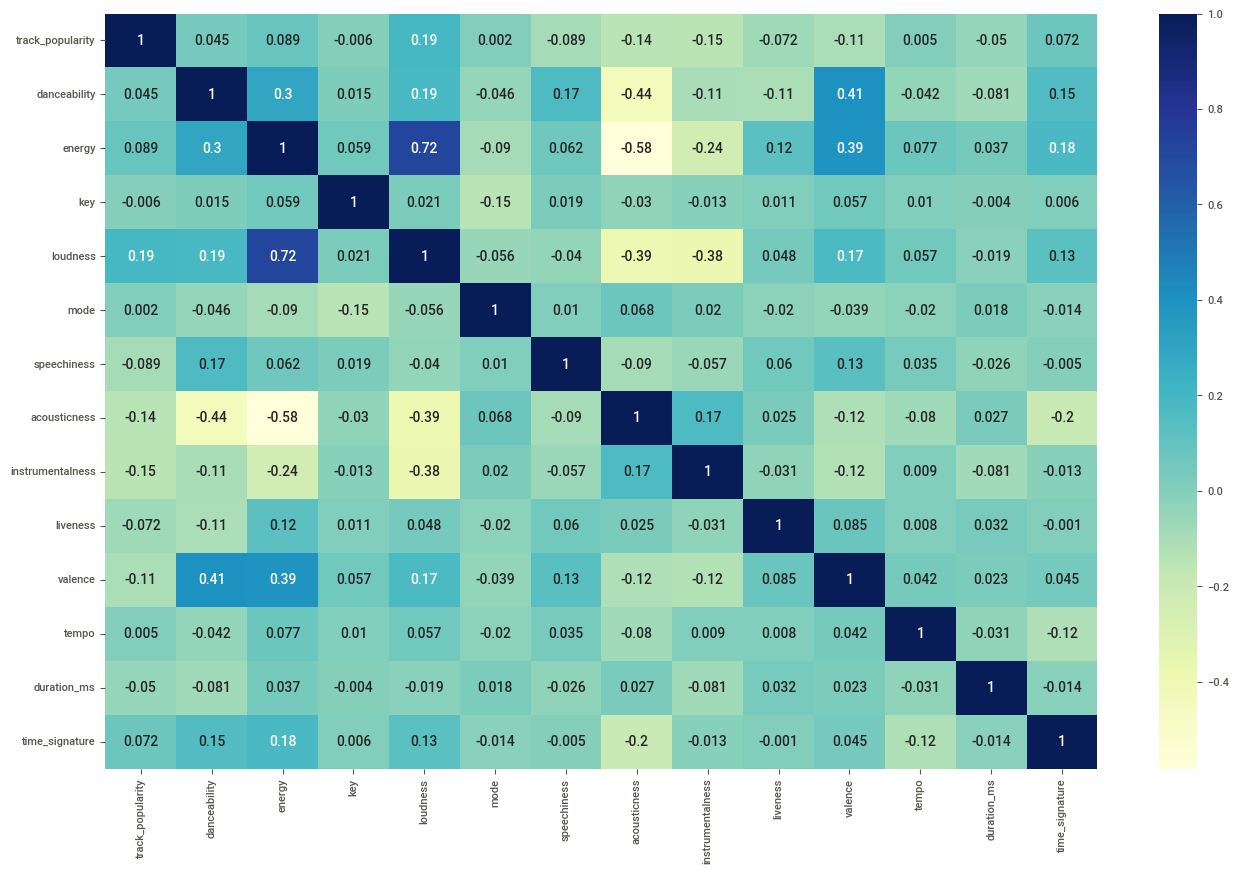

In [477]:
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot = True,cmap="YlGnBu")
plt.show()

####  Graph distribution of the Features Which can be usefull for Model Building With respect to Mode

In [369]:
def freq(col):
    plt.figure(figsize=(5,3))
    g = sns.kdeplot(music_data[col][(music_data['mode']==1)],color = 'Blue',shade = True)
    g.set_xlabel(col)
    g.set_ylabel('Frequency')
    g = g.legend(["1"])
    plt.show()

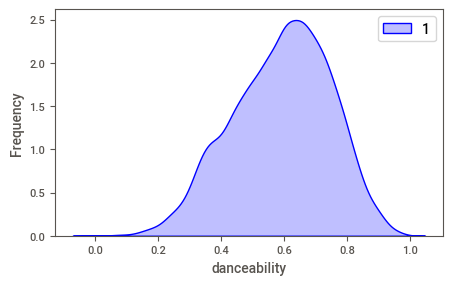

In [370]:
freq("danceability")

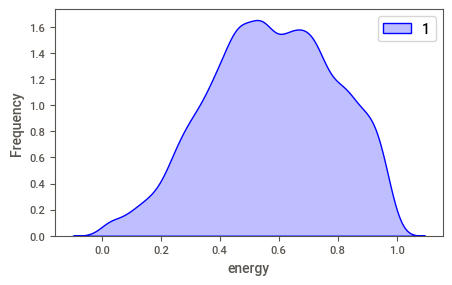

In [371]:
freq("energy")

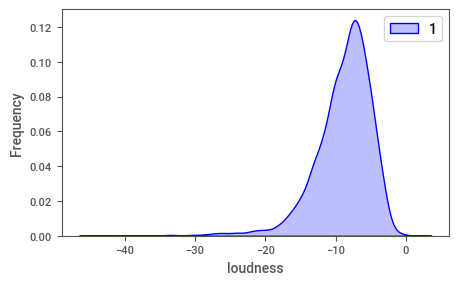

In [372]:
freq("loudness")

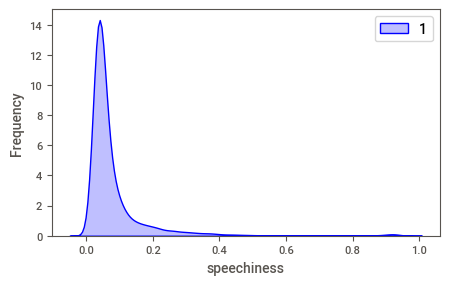

In [373]:
freq("speechiness")

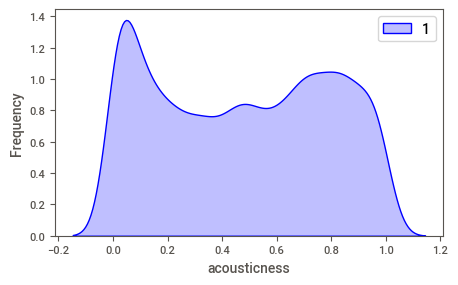

In [374]:
freq("acousticness")

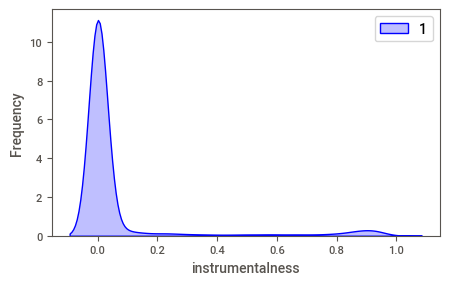

In [375]:
freq("instrumentalness")

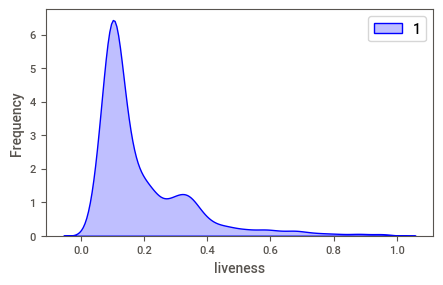

In [376]:
freq("liveness")

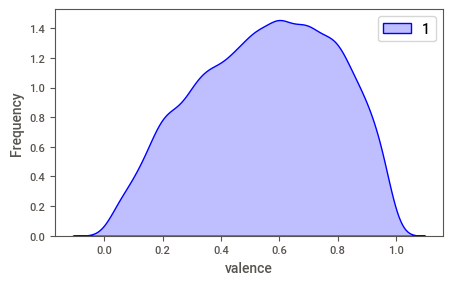

In [377]:
freq("valence")

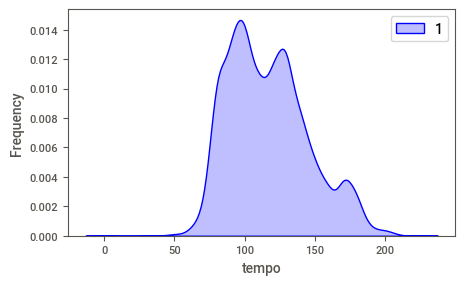

In [378]:
freq("tempo")

### Visualizing Most Popular Songs /Tracks

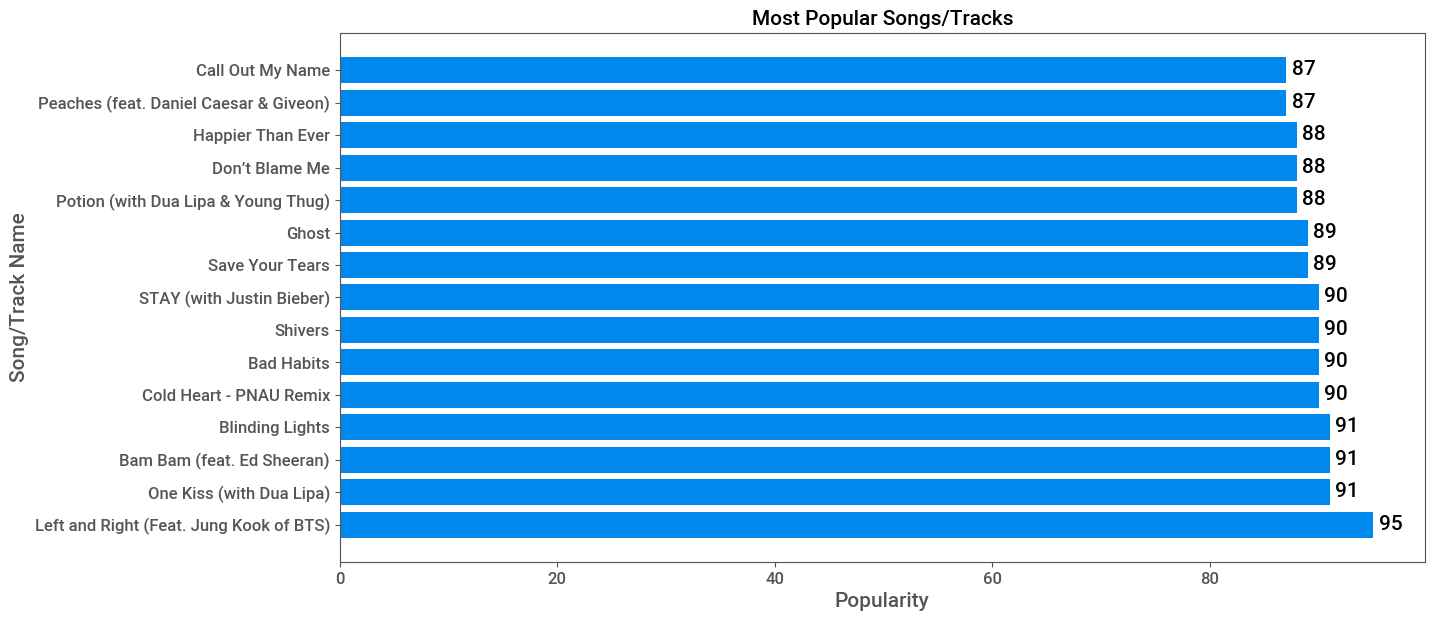

In [379]:
popular_songs = music_data.groupby('track_name')['track_popularity'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14,7))
plt.barh(popular_songs.index, popular_songs)
plt.title('Most Popular Songs/Tracks', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song/Track Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
    
plt.show()

###  Visualizing Most Popular Artists

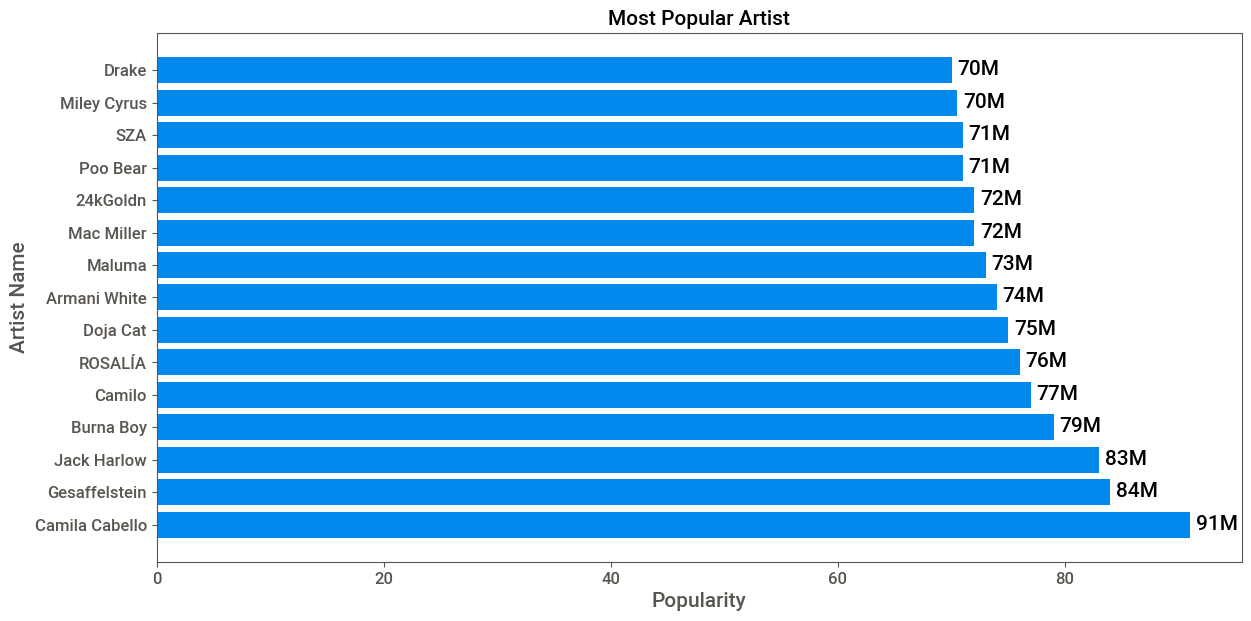

In [380]:
popular_artists = music_data.groupby('artist_name')['track_popularity'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
plt.barh(popular_artists.index, popular_artists)
plt.title('Most Popular Artist', fontdict=dict(fontsize=15), fontweight='bold')
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v))+'M', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

## 6.Model Building

In [381]:
music_data.head()

,artist_name,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Arijit Singh,"Sawan Aaya Hai (From ""Creature 3D"")",6,0.515,0.671,10.0,-7.510,0.0,0.1590,0.260,0.000001,0.140,0.376,80.181,288177.0,4.0
1,Arijit Singh,"Kitni Haseen Hogi (From ""Hit - The First Case"")",0,0.473,0.473,8.0,-9.490,0.0,0.0333,0.361,0.000000,0.109,0.358,102.787,330907.0,4.0
2,Arijit Singh,Tum Hi Ho,70,0.528,0.449,5.0,-6.250,0.0,0.0250,0.785,0.000000,0.122,0.317,94.058,261974.0,4.0
3,Arijit Singh,"Hardum Humdum (From ""Ludo"")",0,0.590,0.821,2.0,-4.933,1.0,0.0444,0.346,0.000008,0.454,0.784,116.942,188000.0,4.0
4,Jeet Gannguli,Arijit Singh Mashup (By DJ Paroma),51,0.583,0.766,9.0,-5.142,0.0,0.0439,0.272,0.000000,0.354,0.437,89.962,245409.0,4.0


In [382]:
! pip install sweetviz
import sweetviz as sv

In [383]:
report   = sv.analyze(music_data)

                                             |                                             | [  0%]   00:00 ->…

In [384]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Normalizing the data to get all the data in same scale for using Manhettan distance similarity for Recommending

In [385]:
def normalize_features(col) :
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d) 

#### Select All the NON CATEGORICAL Features

In [478]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_features(col)     
    

In [479]:
num.corr()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
track_popularity,1.000000,0.044669,0.088588,-0.005672,0.191743,0.001546,-0.088827,-0.144695,-0.152975,-0.071516,-0.111875,0.005110,-0.050096,0.071786
danceability,0.044669,1.000000,0.300865,0.015365,0.190155,-0.046457,0.170554,-0.435831,-0.105979,-0.109704,0.406207,-0.042160,-0.081064,0.153913
energy,0.088588,0.300865,1.000000,0.058591,0.720472,-0.090138,0.062072,-0.581813,-0.235512,0.117241,0.390807,0.076870,0.037307,0.180943
key,-0.005672,0.015365,0.058591,1.000000,0.021401,-0.146654,0.018811,-0.029765,-0.013299,0.010696,0.057317,0.010463,-0.003742,0.005748
loudness,0.191743,0.190155,0.720472,0.021401,1.000000,-0.055546,-0.039651,-0.388861,-0.376354,0.048091,0.172346,0.057338,-0.018817,0.126140
mode,0.001546,-0.046457,-0.090138,-0.146654,-0.055546,1.000000,0.010154,0.067901,0.019581,-0.020412,-0.038825,-0.020341,0.018053,-0.014343
speechiness,-0.088827,0.170554,0.062072,0.018811,-0.039651,0.010154,1.000000,-0.089634,-0.057420,0.060148,0.131999,0.034577,-0.025737,-0.004887
acousticness,-0.144695,-0.435831,-0.581813,-0.029765,-0.388861,0.067901,-0.089634,1.000000,0.166366,0.024856,-0.117928,-0.080424,0.027324,-0.196140
instrumentalness,-0.152975,-0.105979,-0.235512,-0.013299,-0.376354,0.019581,-0.057420,0.166366,1.000000,-0.030832,-0.124557,0.009158,-0.081355,-0.012514
liveness,-0.071516,-0.109704,0.117241,0.010696,0.048091,-0.020412,0.060148,0.024856,-0.030832,1.000000,0.085344,0.008180,0.032360,-0.000721


In [480]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=12)
    km.fit(num)
    wcss.append(km.inertia_)

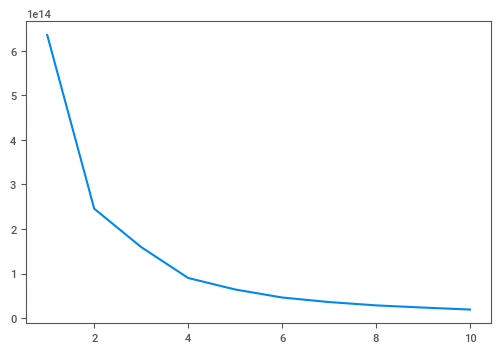

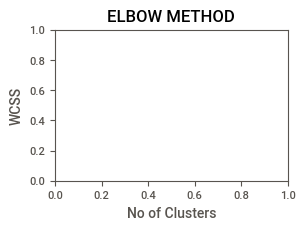

In [481]:
plt.plot(range(1,11),wcss)
plt.figure(figsize=(3,2))
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Hense There is a probability, that songs from the different genres could have quite similar characteristics, and that's not fine.

#### For example, Arijit Singh songs won't be an accurate recomendation for Pankaj Udas songs.

#### That's why we will create a new feature, which would differ the songs from different groups.

#### We will use KMeans clusterization with 10 clusters for this goal.

In [482]:
kmeans = KMeans(n_clusters=10)
cat = kmeans.fit_predict(num)

music_data['cat'] = cat
normalize_features('cat')

In [483]:
music_data.cat[:10]

0    0.000000
1    0.555556
2    0.000000
3    0.444444
4    0.000000
5    0.555556
6    0.000000
7    0.555556
8    0.555556
9    0.444444
Name: cat, dtype: float64

In [484]:
song1 = music_data[music_data.track_name == 'Ghungroo']
song1

,artist_name,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cat
179,Arijit Singh,Ghungroo,0.410526,0.71209,0.72685,0.545455,0.769001,0.0,0.033716,0.074698,0.000176,0.531989,0.871847,0.512779,0.051939,0.8,0.555556


## 7. Model Training  ||  Model Evaluation

In [485]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.track_name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.track_name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [0,1]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artist_name', 'track_name']
        return res_data[columns][:amount]

## Song Recommnedation

In [486]:
recommender = SpotifyRecommender(music_data)

In [487]:
recommender.get_recommendations('Lag ja Gale', 10)

100%|█████████████████████████████████████████████████████████████████████████| 19108/19108 [00:01<00:00, 14718.24it/s]


,artist_name,track_name
26338,Jonita Gandhi,"Lag Ja Gale (From ""Saheb Biwi Aur Gangster 3"")"
26166,Jonita Gandhi,"Lag Ja Gale (From ""Sahib Biwi Aur Gangster 3"")"
7774,Mohammed Rafi,Kahan Ja Raha Hai
6252,Sid Sriram,"Haayagide - From ""Tom And Jerry"""
26247,Jonita Gandhi,"Ehsan Tera Hoga Mujh Par (From ""Carvaan Lounge..."
13454,Armaan Malik,Sayyare
3257,Jubin Nautiyal,"Dil Chahte Ho (From ""Dil Chahte Ho"")"
27505,K. S. Chithra,Kudajadriyil
26443,Ankit Kholia,Mujhko Pyaar Ho Gaya
26471,Gurinder Seagal,Baby! Tu Na Jaa


In [488]:
recommender.get_recommendations('Kala Chashma', 10)

100%|█████████████████████████████████████████████████████████████████████████| 19108/19108 [00:01<00:00, 14183.24it/s]


,artist_name,track_name
12263,A.B. Quintanilla III Y Los Kumbia Kings,Chiquilla
80,Pritam,"Haan Main Galat (From ""Love Aaj Kal"")"
106,Pritam,Haan Main Galat
20189,Dua Lipa,Love Is Religion (The Blessed Madonna Remix) [...
1121,Sonu Nigam,Dil Dooba
23798,Nucleya,Let's Nacho
20188,Sean Paul,No Lie - Sam Feldt Remix
19487,Ed Sheeran,South of the Border (feat. Camila Cabello & Ca...
6675,Romy,"Pyaar Tenu Karda Gabru (From ""Shubh Mangal Zya..."
20226,Dua Lipa,Love Is Religion (The Blessed Madonna Remix)


In [489]:
recommender.get_recommendations('Take my breath', 10)

100%|█████████████████████████████████████████████████████████████████████████| 19108/19108 [00:01<00:00, 13559.35it/s]


,artist_name,track_name
15265,The Weeknd,Wicked Games
20170,Dua Lipa,Begging
16081,Taylor Swift,State Of Grace (Taylor's Version)
16821,Ariana Grande,breathin
13891,Chris Brown,Next To You (feat. Justin Bieber) - Radio Edit
6048,Girishh,Idhuvum Kadandhu Pogum (The Healing Song) (Fro...
19743,Nekfeu,Reuf
16033,Taylor Swift,Message In A Bottle (Taylor's Version) (From T...
6059,Sid Sriram,Prema O Premaa
13774,DJ Snake,Let Me Love You - Marshmello Remix


In [490]:
recommender.get_recommendations('willow', 10)

100%|█████████████████████████████████████████████████████████████████████████| 19108/19108 [00:01<00:00, 14099.52it/s]


,artist_name,track_name
12,Arijit Singh,Atak Gaya - Arijit Singh
16000,Taylor Swift,Lover
41,Shaarib Toshi,"Bandeya (feat. Arijit Singh) - From ""Dil Juung..."
13778,Justin Bieber,Holy - Acoustic
30,Pritam,Naina
18501,Shawn Mendes,Three Empty Words
369,Arijit Singh,Wafa Ne Bewafai
27,Pritam,Phir Le Aya Dil - Reprise
16448,Taylor Swift,willow - moonlit witch version
6010,"Sid Sriram, ADK",Vellipomaake


## Artist Recommendation

In [497]:
class SpotifyRecommender_Artist():
    def __init__(self_1, rec_data_1):
        self_1.rec_data__1 = rec_data_1
    
    def get_recommendations_artist(self_1, artist_name_1, amount=1):
        distances = []
        artist = self_1.rec_data__1[(self_1.rec_data__1.artist_name.str.lower() == artist_name_1.lower())].head(1).values[0]
        res_data_1 = self_1.rec_data__1[self_1.rec_data__1.artist_name.str.lower() != artist_name_1.lower()]
        for r_artist in tqdm(res_data_1.values):
            dist = 0
            for col in np.arange(len(res_data_1.columns)):
                if not col in [0,1]:
                    dist = dist + np.absolute(float(artist[col]) - float(r_artist[col]))
            distances.append(dist)
        res_data_1['distance'] = distances
        res_data_1 = res_data_1.sort_values('distance')
        columns = ['artist_name', 'track_name']
        return res_data_1[columns][:amount]

In [498]:
recommender_artist = SpotifyRecommender_Artist(music_data)

In [499]:
recommender_artist.get_recommendations_artist('Lata Mangeshkar', 10)

100%|█████████████████████████████████████████████████████████████████████████| 18333/18333 [00:01<00:00, 13740.45it/s]


,artist_name,track_name
9379,Alka Yagnik,"Aksar Is Duniya Mein (From ""Dhadkan"")"
10011,Udit Narayan,Pyar To Hota Hai Pyar
8730,Alka Yagnik,Ek Jawani Teri Ek Jawani Meri
25940,Salim Merchant,Aashiyana
8526,Alisha Chinai,Chot Dil Pe Lagi
8502,Kumar Sanu,"Kaash Kahin Aisa Hota (From ""Mohra"")"
29246,Hariharan,Andagathi
9500,Alka Yagnik,Tip Tip Barsa Paani (With Jhankar Beats)
85,Mithoon,"Sanam Re (From ""Sanam Re"")"
9216,Asha Bhosle,Mujhse Dosti Karoge


In [500]:
recommender_artist.get_recommendations_artist('Arijit singh', 10)

100%|█████████████████████████████████████████████████████████████████████████| 18711/18711 [00:01<00:00, 13019.31it/s]


,artist_name,track_name
8152,Kumar Sanu,Tumi Kothay Acho
28451,Rajesh Krishnan,Ee Olavu
5494,Thaman S,Aunanaa Kaadanaa
13592,Armaan Malik,"Anumanave Illa (From ""Kariya 2"")"
1998,Sonu Nigam,Rani
27225,K. S. Chithra,Yedarilo Koila
26372,Jonita Gandhi,Nasha Tera
3258,Jubin Nautiyal,"Meri Aashiqui (From ""Meri Aashiqui"")"
14196,Justin Bieber,Hold Tight - Single Version
27991,Rajesh Krishnan,"Huchhanade Huchhanade (From ""Abhinandane"")"


In [501]:
recommender_artist.get_recommendations_artist('Taylor Swift', 10)

100%|█████████████████████████████████████████████████████████████████████████| 18791/18791 [00:01<00:00, 13979.00it/s]


,artist_name,track_name
20175,Dua Lipa,New Rules - Alison Wonderland Remix
15229,The Weeknd,Often
21628,ZAYN,Sweat
125,Mithoon,"Soch Liya (From ""Radhe Shyam"")"
15562,Meek Mill,Pullin Up (feat. The Weeknd)
15236,The Weeknd,Six Feet Under
15387,The Weeknd,Angel
5998,A.R. Rahman,Ennodu Nee Irundhaal
13175,Armaan Malik,Main Hoon Hero Tera (Armaan Malik Version)
19297,Ed Sheeran,Bad Habits (feat. Bring Me The Horizon)


In [502]:
recommender_artist.get_recommendations_artist('Shawn Mendes', 10)

100%|█████████████████████████████████████████████████████████████████████████| 18982/18982 [00:01<00:00, 14237.81it/s]


,artist_name,track_name
16925,Ariana Grande,Be My Baby
16863,Ariana Grande,bloodline
16012,Taylor Swift,I Knew You Were Trouble.
17669,Billie Eilish,Ocean Eyes - Blackbear Remix
20005,Miley Cyrus,Prisoner (feat. Dua Lipa)
16048,HAIM,Gasoline (feat. Taylor Swift)
20022,Dua Lipa,Blow Your Mind (Mwah)
13686,Justin Bieber,Come Around Me
25331,Amit Trivedi,Ishaqzaade - Violin Version (Instrumental)
2117,Jass Manak,Naah
